# xESMF
https://xesmf.readthedocs.io/en/latest/why.html

## Tutorial
https://xesmf.readthedocs.io/en/latest/notebooks/Rectilinear_grid.html

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xesmf as xe
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 184 GB / percent used: 26.9 %


In [2]:
ds = xr.tutorial.open_dataset('air_temperature') # use xr.tutorial.load_dataset() for xarray<v0.11.0
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
# Get the variable and perdiod
da = ds.air
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

<IPython.core.display.Javascript object>


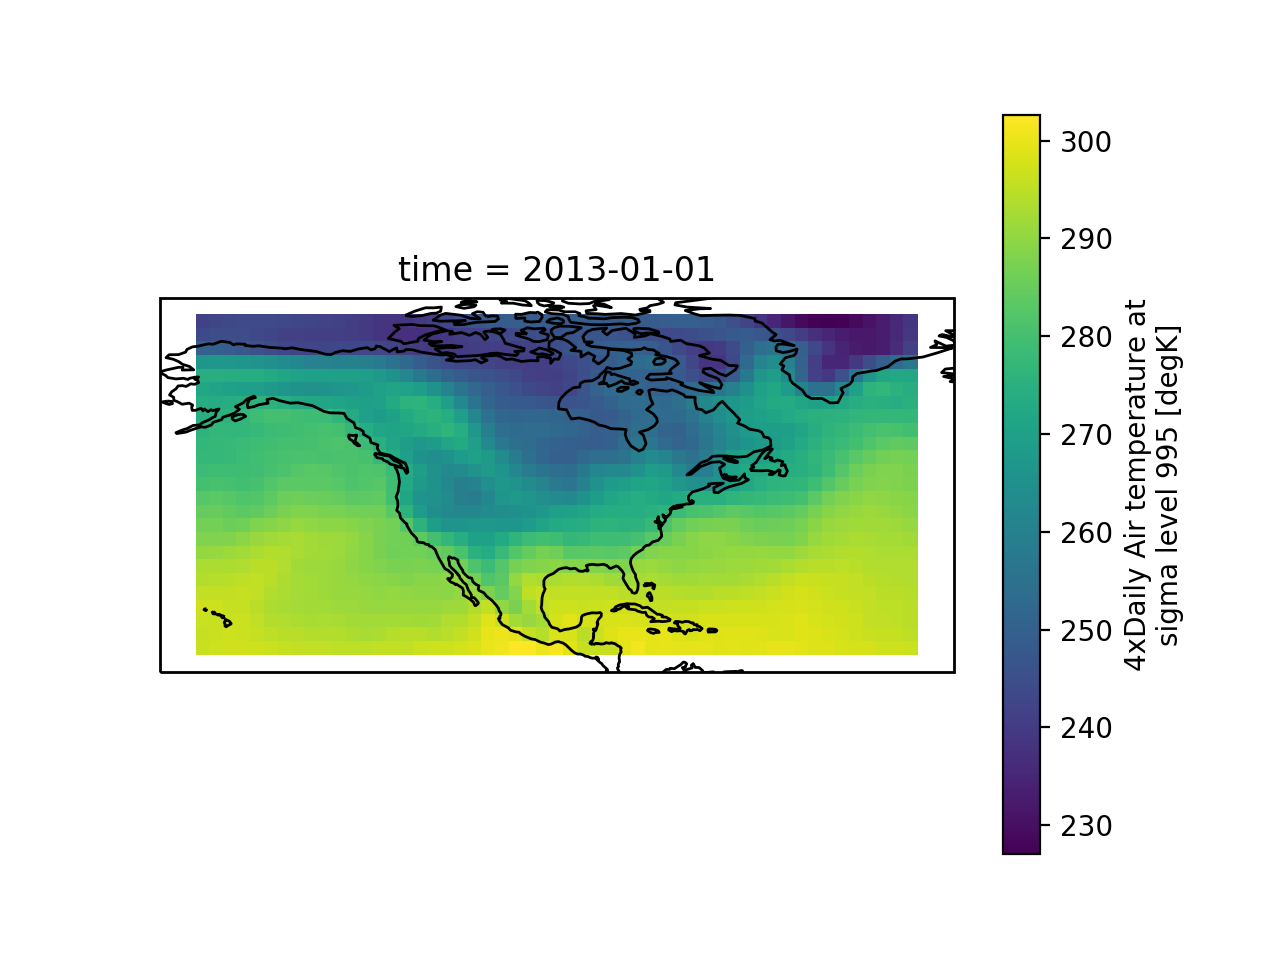

In [4]:
# Plot
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
da[0].plot(ax=ax)
ax.coastlines()

<IPython.core.display.Javascript object>


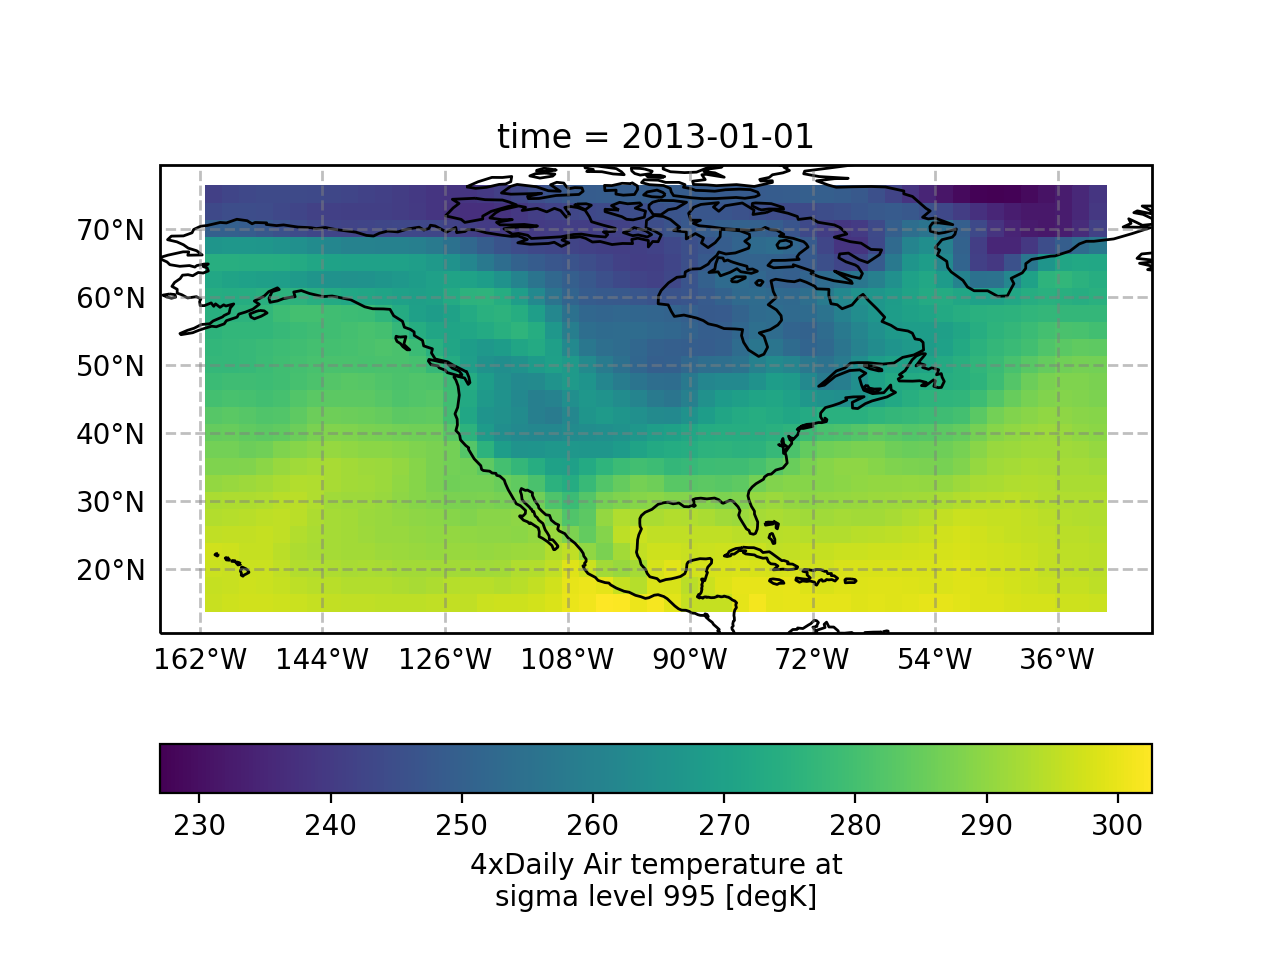

In [5]:
# Advance plot
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())

da[0].plot(
    ax=ax, transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Input grid 2.5° x 2.5°

In [6]:
ds.lat

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [7]:
ds.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [8]:
180-160+180

200

## Output grid 1.0° x 1.5°

In [9]:
ds_out = xr.Dataset(
    {
        'lat': (['lat'], np.arange(16, 75, 1.0)),
        'lon': (['lon'], np.arange(200, 330, 1.5))
    }
)
ds_out

<xarray.Dataset>
Dimensions:  (lat: 59, lon: 87)
Coordinates:
  * lat      (lat) float64 16.0 17.0 18.0 19.0 20.0 ... 70.0 71.0 72.0 73.0 74.0
  * lon      (lon) float64 200.0 201.5 203.0 204.5 ... 324.5 326.0 327.5 329.0
Data variables:
    *empty*

## Perform regridding

Important note: Extra dimensions must be on the left, i.e. (time, lev, lat, lon) is correct but (lat, lon, time, lev) would not work. Most data sets should have (lat, lon) on the right (being the fastest changing dimension in the memory). If not, use DataArray.transpose or numpy.transpose to preprocess the data.

In [10]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder  # print basic regridder information.

Create weight file: bilinear_25x53_59x87.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_25x53_59x87.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (59, 87) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [11]:
da_out = regridder(da)
da_out

<xarray.DataArray 'air' (time: 2920, lat: 59, lon: 87)>
array([[[296.13399675, 296.38669304, 296.63889823, ..., 296.47490793,
         296.43398913, 296.19924566],
        [295.97800871, 296.18274797, 296.42534501, ..., 296.09262341,
         296.07802394, 295.72098714],
        [296.04001766, 296.13556275, 296.30247974, ..., 295.77692914,
         295.73997197, 295.35693248],
        ...,
        [245.04017912, 245.36087049, 245.56096188, ..., 233.93629106,
         235.51802332, 238.0780694 ],
        [243.27991042, 243.77519503, 244.17375053, ..., 233.81591274,
         235.33999633, 237.63241841],
        [242.24003289, 242.87912303, 243.43775032, ..., 233.84791841,
         235.41999207, 237.49641598]],

       [[296.25399643, 296.70203773, 297.03166485, ..., 296.06514956,
         296.03998263, 296.01773136],
        [296.2179898 , 296.56767711, 296.82291528, ..., 295.7292558 ,
         295.6800262 , 295.5138904 ],
        [296.23999022, 296.42058286, 296.56714652, ..., 295.50442

<IPython.core.display.Javascript object>


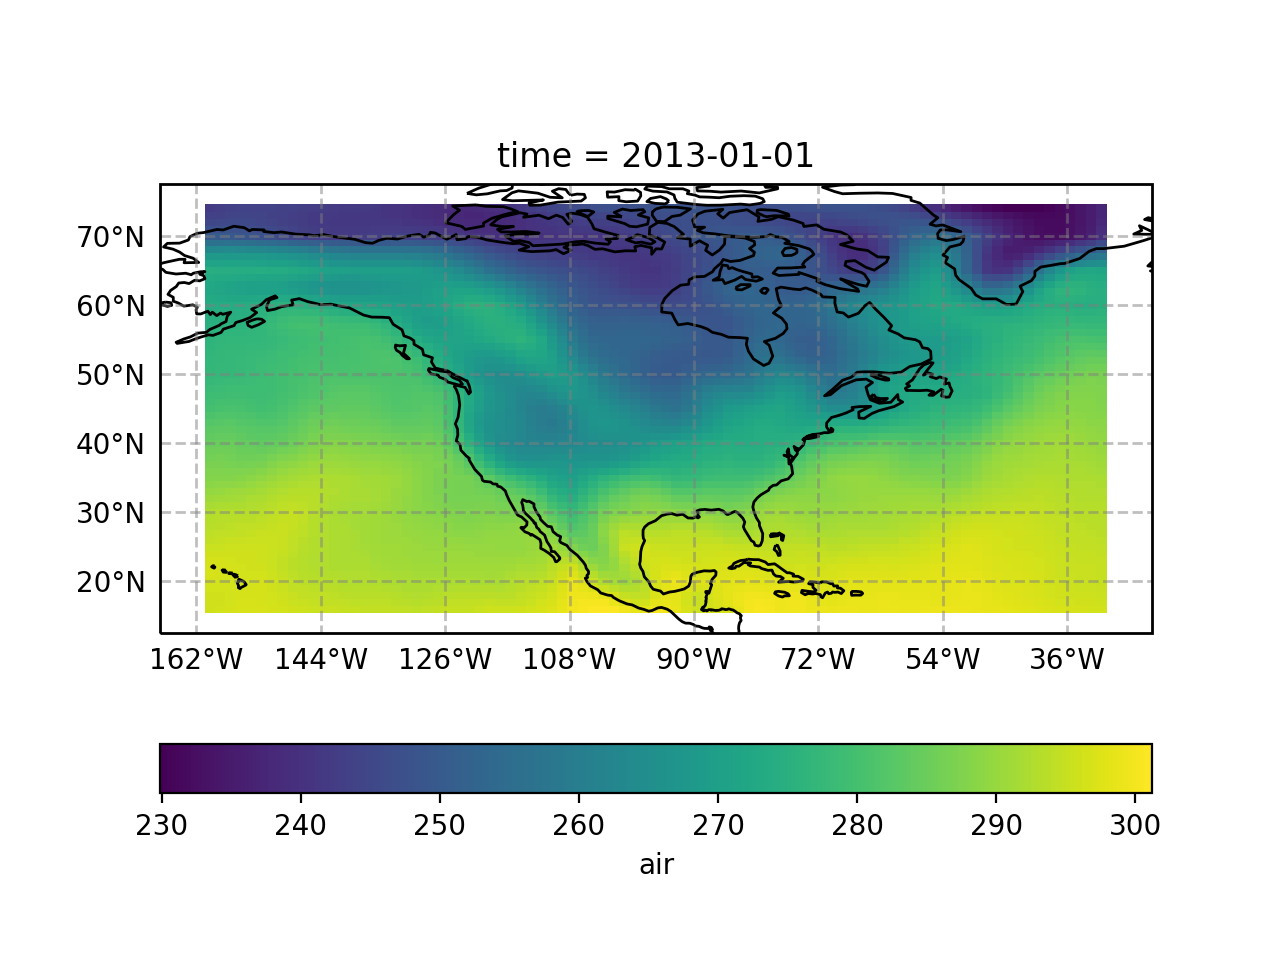

In [12]:
# Advance plot
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())

da_out[0].plot(
    ax=ax, transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Check broadcasting over extra dimensions

In [13]:
da_out.time

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [14]:
# exactly the same as input
xr.testing.assert_identical(da_out['time'], da['time'])

<IPython.core.display.Javascript object>


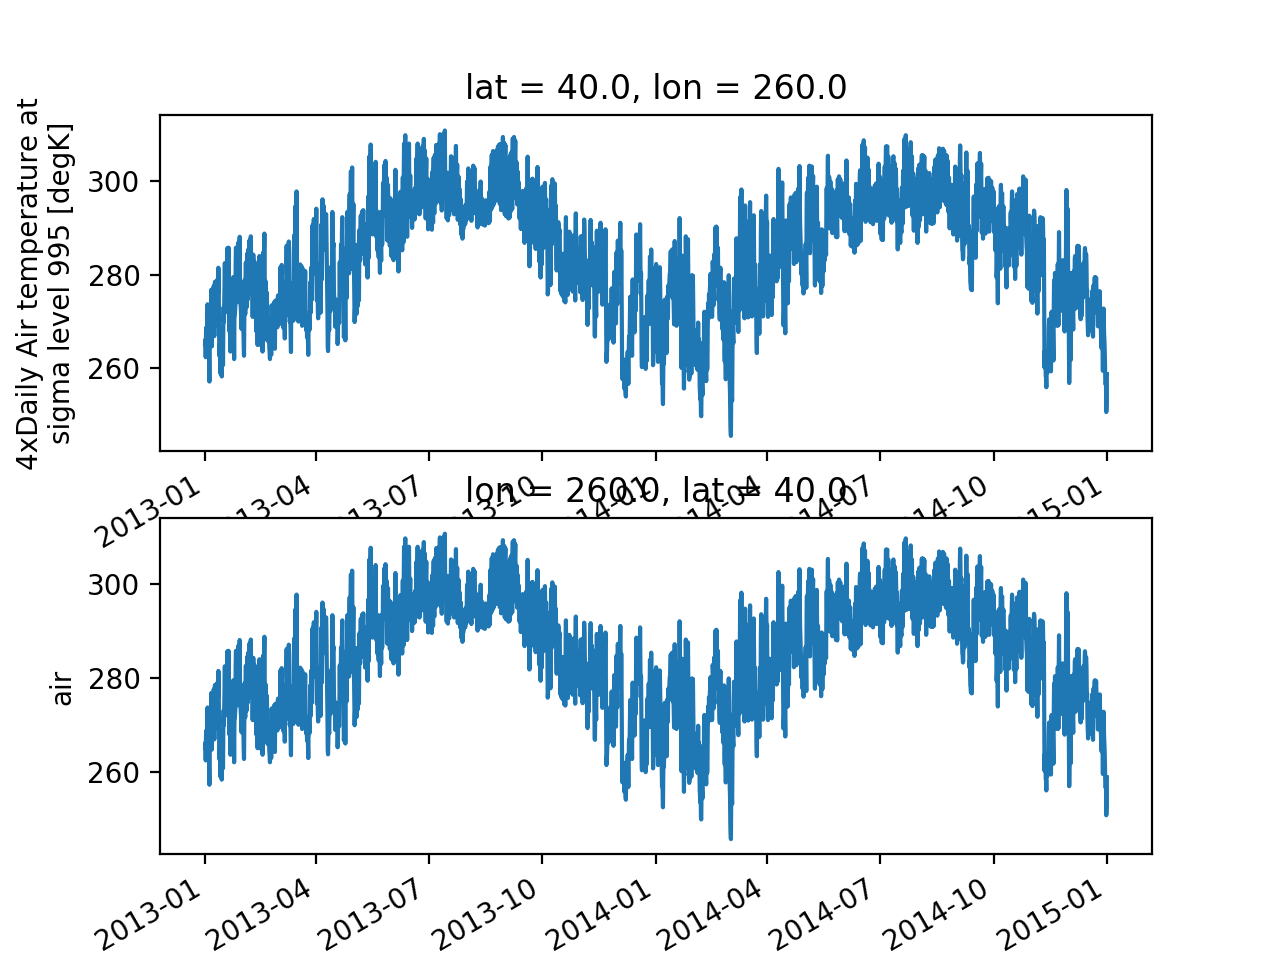

In [15]:
plt.figure()
plt.subplot(2,1,1)
da.sel(lon=260, lat=40).plot()  # input data
plt.subplot(2,1,2)
da_out.sel(lon=260, lat=40).plot()  # output data

<IPython.core.display.Javascript object>


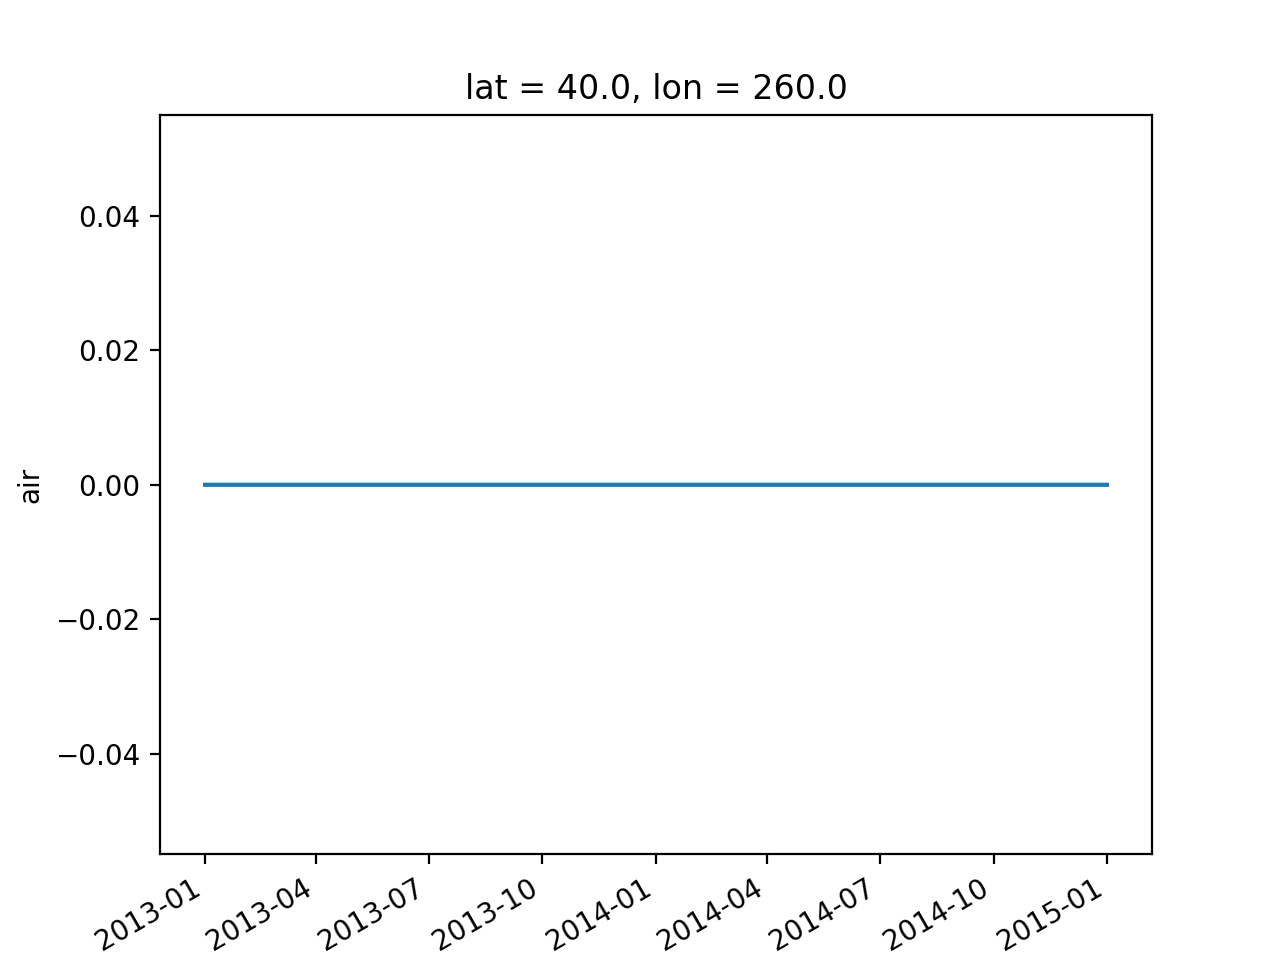

In [50]:
plt.figure()
(da.sel(lon=260, lat=40)-da_out.sel(lon=260, lat=40)).plot()

## Clean-up
xESMF saves the regridder to the current directory so you don’t need to re-compute it next time (see Save time by reusing regridder). If you don’t need it anymore, you can just delete it:

In [16]:
regridder.clean_weight_file()  # regridder.c + TAB would bring-up the command

Remove file bilinear_25x53_59x87.nc
